In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from time import time
import xlsxwriter 
import plotly.graph_objs as go
from plotly.offline import plot

Data base:

"mapes.xlsx" : documento en el cual se toman en cuenta todos los dummies

"mapes_ms.xlsx" : docuemento en el cual se remueve dummies de mes y semana

"mapes_ds.xlsx" : documento en el que se remueve dummies de dia de la semana y season

## Gráficos 

###### Para ver que los mapes por hora y zona

Para leer los excels: frame["frs", "frs_ms","frs_ds"]

In [ ]:
frame ={}; names = ["frs", "frs_ms","frs_ds"]
for nomb in names:
    frame[nomb] = pd.DataFrame()
    for i in range(-3, 6):
        fr = pd.read_excel(f"mapes{nomb[3:]}.xlsx", sheet_name=f"zh_1_{i}")
        frame[nomb] = pd.concat([frame[nomb], fr], axis = 1)
        if i>-3:
            frame[nomb] = frame[nomb].drop([f"Zona_zh_{i-1}", f"hora_zh_{i-1}"], axis = 1)
            frame[nomb] = frame[nomb].drop(f"AR_zh_{i-1}", axis = 1)
    old = ["AR_zh_5", "Zona_zh_5", "hora_zh_5"]; new = ["AR", "zona", "hora"]
    frame[nomb].rename(columns=dict(zip(old, new)), inplace=True)

In [125]:
frame["frs"].head(2)

,Sck_zh_-3,XGB_zh_-3,Sck_zh_-2,XGB_zh_-2,Sck_zh_-1,XGB_zh_-1,Sck_zh_0,XGB_zh_0,Sck_zh_1,XGB_zh_1,...,XGB_zh_2,Sck_zh_3,XGB_zh_3,Sck_zh_4,XGB_zh_4,Sck_zh_5,XGB_zh_5,AR,zona,hora
0,7.189164,10.129643,4.347421,8.917997,7.643850,19.630526,6.151498,8.909635,11.305184,22.947281,...,15.229243,27.261809,17.866191,10.302700,25.443633,5.573677,9.691575,7.926682,zona_1,1
1,6.739938,6.289116,7.902703,13.101060,7.618991,71.594439,6.102021,29.373053,8.040957,25.412474,...,7.247964,6.753585,29.691260,7.493557,44.271881,6.734144,7.464127,5.234445,zona_1,2


In [127]:
frame["frs_ms"].head(2)

,Sck_zh_-3,XGB_zh_-3,Sck_zh_-2,XGB_zh_-2,Sck_zh_-1,XGB_zh_-1,Sck_zh_0,XGB_zh_0,Sck_zh_1,XGB_zh_1,...,XGB_zh_2,Sck_zh_3,XGB_zh_3,Sck_zh_4,XGB_zh_4,Sck_zh_5,XGB_zh_5,AR,zona,hora
0,8.272178,7.597869,6.795338,5.425469,8.455263,9.402653,9.820355,24.642153,7.623504,9.657625,...,10.098903,7.510282,7.478886,6.473499,10.616344,7.486400,6.948677,7.926682,zona_1,1
1,6.759846,7.153581,11.632117,7.187695,6.837641,69.866512,8.160665,115.772252,8.327059,19.574257,...,7.646360,6.224255,7.085991,8.038842,5.933534,7.319957,15.651974,5.234445,zona_1,2


In [128]:
frame["frs_ds"].head(2)

,Sck_zh_-3,XGB_zh_-3,Sck_zh_-2,XGB_zh_-2,Sck_zh_-1,XGB_zh_-1,Sck_zh_0,XGB_zh_0,Sck_zh_1,XGB_zh_1,...,XGB_zh_2,Sck_zh_3,XGB_zh_3,Sck_zh_4,XGB_zh_4,Sck_zh_5,XGB_zh_5,AR,zona,hora
0,4.970718,8.108735,6.813522,7.570908,6.813522,7.570908,4.897285,6.422321,6.813522,7.570908,...,8.932790,4.534253,4.914394,5.701411,6.860995,5.701411,6.860995,7.926682,zona_1,1
1,6.515395,6.780327,6.935346,7.197980,6.935346,7.197980,6.146305,6.522823,5.977609,6.977393,...,6.977393,6.190817,6.941480,6.935346,7.197980,6.403103,4.315702,5.234445,zona_1,2


Para hacer dataframes recortados

In [74]:
frenos = [frs, frs_ms, frs_ds]; rango = 6.5; d = {}
for name, [s, j] in zip(["mecin", "mecin_ms", "mecin_ds"], enumerate(frenos)):
    d[name] = pd.DataFrame()
    for k in ["Sck", "XGB"]:
        for i in range(-3, 6):
            con = j[f"{k}_zh_{i}"][j[f"{k}_zh_{i}"]<rango]
            d[name] = pd.concat([d[name], con], axis = 1)
    d[name] = pd.concat([d[name], j["AR"][j["AR"]<rango]], axis = 1)
    d[name] = pd.concat([d[name], j["zona"]], axis = 1)
    d[name] = pd.concat([d[name], j["hora"]], axis = 1)
    exec(f"{name} = d[name]")

In [94]:
frame["frs"].head(2)

,Sck_zh_-3,XGB_zh_-3,Sck_zh_-2,XGB_zh_-2,Sck_zh_-1,XGB_zh_-1,Sck_zh_0,XGB_zh_0,Sck_zh_1,XGB_zh_1,...,XGB_zh_2,Sck_zh_3,XGB_zh_3,Sck_zh_4,XGB_zh_4,Sck_zh_5,XGB_zh_5,AR,zona,hora
0,4.970718,8.108735,6.813522,7.570908,6.813522,7.570908,4.897285,6.422321,6.813522,7.570908,...,8.932790,4.534253,4.914394,5.701411,6.860995,5.701411,6.860995,7.926682,zona_1,1
1,6.515395,6.780327,6.935346,7.197980,6.935346,7.197980,6.146305,6.522823,5.977609,6.977393,...,6.977393,6.190817,6.941480,6.935346,7.197980,6.403103,4.315702,5.234445,zona_1,2


Para graficar dataframes recortados

In [129]:
datas = []
for i, j in zip(d.values(), d.keys()):
    for k in range(-3, 6):
        data1 = go.Scatter(x=i.XGB_zh_0.index, y=i[f"XGB_zh_{k}"], text=list(zip(i.hora, i.zona)), name=f"XGB_{k}_{j}", hoverinfo='text', hovertemplate='hora_%{text} mape_%{y:.3f}')
        data2 = go.Scatter(x=i.XGB_zh_0.index, y=i[f"Sck_zh_{k}"], text=list(zip(i.hora, i.zona)), name=f"Sck_{k}_{j}", hoverinfo='text', hovertemplate='hora_%{text} mape_%{y:.3f}')
        datas.append(data1)
        datas.append(data2)

data = go.Scatter(x=i.XGB_zh_0.index, y=i["AR"], text=list(zip(i.hora, i.zona)), name="AR", hoverinfo='text', hovertemplate='hora_%{text} mape_%{y:.3f}')
datas.append(data)
fig=go.Figure(data = datas)
plot(fig)

'temp-plot.html'

In [37]:
# mecin.query("Zona_zh_5 == 'zona_6' & hora_zh_5 == 7" )

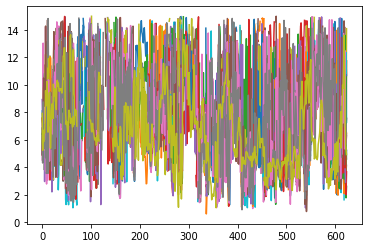

In [203]:
for k in ["Sck", "XGB"]:
    for i in range(-3, 6):
        plt.plot(mecin[f"{k}_zh_{i}"])
plt.plot(mecin["AR_zh_-3"]);

In [204]:
import plotly.graph_objs as go
from plotly.offline import plot

In [205]:
datas = []
for k in range(-3, 6):
    data = go.Scatter(x=frs.XGB_zh_0.index, y=frs[f"Sck_zh_{k}"], text=list(zip(frs.Zona_zh_5, frs.hora_zh_5)), name=f"Sck_{k}", hoverinfo='text', hovertemplate='%{text} hora %{y}_mape')
    datas.append(data)

fig=go.Figure(data = datas)
plot(fig)

'temp-plot.html'

In [206]:
datas = []
for k in range(-3, 6):
    data = go.Scatter(x=frs.XGB_zh_0.index, y=frs[f"XGB_zh_{k}"], text=list(zip(frs.Zona_zh_5, frs.hora_zh_5)), name=f"XGB_{k}", hoverinfo='text', hovertemplate='%{text} hora %{y}_mape')
    datas.append(data)

fig=go.Figure(data = datas)
plot(fig)

'temp-plot.html'

In [209]:
datas = []
for k in range(-3, 6):
    data = go.Scatter(x=frs.XGB_zh_0.index, y=frs[f"AR_zh_{k}"], text=list(zip(frs.Zona_zh_5, frs.hora_zh_5)), name=f"AR_{k}", hoverinfo='text', hovertemplate='%{text} hora %{y}_mape')
    data1 = go.Scatter(x=frs.XGB_zh_0.index, y=frs[f"XGB_zh_{k}"], text=list(zip(frs.Zona_zh_5, frs.hora_zh_5)), name=f"XGB_{k}", hoverinfo='text', hovertemplate='%{text} hora %{y}_mape')
    data2 = go.Scatter(x=frs.XGB_zh_0.index, y=frs[f"Sck_zh_{k}"], text=list(zip(frs.Zona_zh_5, frs.hora_zh_5)), name=f"AR_{k}", hoverinfo='text', hovertemplate='%{text} hora %{y}_mape')
    datas.append(data)
    datas.append(data1)
    datas.append(data2)

fig=go.Figure(data = datas)
plot(fig)

'temp-plot.html'

In [208]:
datas = []

for k in range(-3, 6):
    data1 = go.Scatter(x=mecin.XGB_zh_0.index, y=mecin[f"XGB_zh_{k}"], text=list(zip(mecin.zona, mecin.hora_)), name=f"XGB_{k}_{}", hoverinfo='text', hovertemplate='%{text} hora %{y}_mape')
    data2 = go.Scatter(x=mecin.XGB_zh_0.index, y=mecin[f"Sck_zh_{k}"], text=list(zip(mecin.zona, mecin.hora_)), name=f"AR_{k}", hoverinfo='text', hovertemplate='%{text} hora %{y}_mape')
    datas.append(data1)
    datas.append(data2)

data = go.Scatter(x=mecin.XGB_zh_0.index, y=mecin["AR"], text=list(zip(mecin.zona_, mecin.hora_)), name="AR", hoverinfo='text', hovertemplate='%{text} hora %{y}_mape')
datas.append(data)
fig=go.Figure(data = datas)
plot(fig)

'temp-plot.html'

In [ ]:
import plotly.graph_objs as go
from plotly.offline import plot

In [162]:
data1=go.Scatter(x=fr.XGB.index, y=fr.Sck, text=list(zip(fr.Zona, fr.hora)), name="Sck", hoverinfo='text', hovertemplate='%{text} hora')
data2=go.Scatter(x=fr.XGB.index, y=fr.AR, text=list(zip(fr.Zona, fr.hora)), name='AR', hoverinfo='text', hovertemplate='%{text} hora')
fig=go.Figure(data = [data1, data2])
plot(fig)

'temp-plot.html'

In [181]:
data1=go.Scatter(x=frzh.Sck.index, y=frzh.Sck, text=list(zip(frzh.Zona, frzh.hora)), name='Sck', hoverinfo='text', hovertemplate='%{text} hora')
data2=go.Scatter(x=frzh.Sck.index, y=frzh.AR, text=list(zip(frzh.Zona, frzh.hora)), name='AR', hoverinfo='text', hovertemplate='%{text} hora')
fig=go.Figure(data = [data1,data2])
plot(fig)

'temp-plot.html'